In [74]:
import pandas as pd
import joblib

final_df = pd.read_csv('/Users/ivantyshchenko/Documents/GitHub/4-pythonic-squad/source/train/final_dataset.csv')
final_df = final_df.drop(['date', 'hour_datetime', "is_alarm"], axis=1)


(191120, 735)

In [85]:
import pandas as pd
        
final_weather_alarms = pd.read_csv('../final_weather_alarms.csv')
final_weather_alarms


,day_datetime,hour_datetime,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_solarradiation,...,hour_uvindex,hour_severerisk,region_id,event_all_region,event_intersection_alarm_id,is_alarm,num_of_reg_alarms,num_of_alarms24,light_day_duration,event_duration
0,2022-02-24,00:00:00,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,...,0.0,10.0,3,0.0,0.0,0,0,0,10.625000,0.0
1,2022-02-24,01:00:00,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,...,0.0,10.0,3,0.0,0.0,0,0,0,10.625000,0.0
2,2022-02-24,02:00:00,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,...,0.0,10.0,3,0.0,0.0,0,0,0,10.625000,0.0
3,2022-02-24,03:00:00,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,...,0.0,10.0,3,0.0,0.0,0,0,0,10.625000,0.0
4,2022-02-24,04:00:00,4.9,0.7,2.6,0.0,83.7,0.118,4.17,36.9,...,0.0,10.0,3,0.0,0.0,0,0,0,10.625000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195080,2023-01-20,19:00:00,11.2,5.7,7.9,6.2,89.3,0.600,12.50,16.8,...,0.0,10.0,2,0.0,0.0,0,0,4,8.844167,0.0
195081,2023-01-20,20:00:00,11.2,5.7,7.9,6.2,89.3,0.600,12.50,16.8,...,0.0,10.0,2,0.0,0.0,0,0,4,8.844167,0.0
195082,2023-01-20,21:00:00,11.2,5.7,7.9,6.2,89.3,0.600,12.50,16.8,...,0.0,10.0,2,0.0,0.0,0,0,4,8.844167,0.0
195083,2023-01-20,22:00:00,11.2,5.7,7.9,6.2,89.3,0.600,12.50,16.8,...,0.0,10.0,2,0.0,0.0,0,6,4,8.844167,0.0


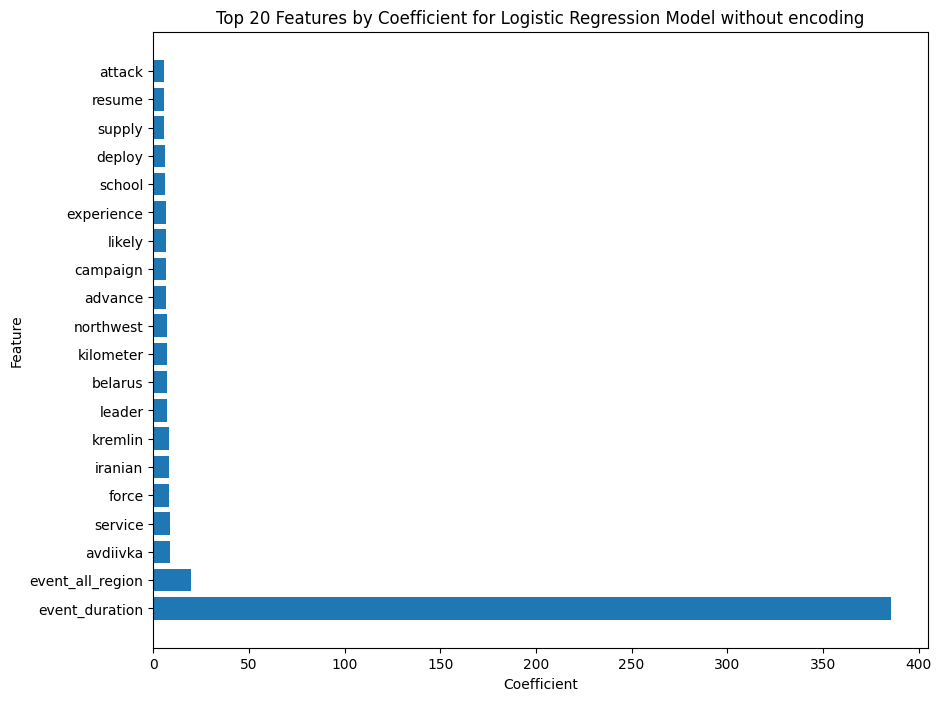

In [75]:
import matplotlib.pyplot as plt
feature_names = final_df.columns.tolist()


logistic_model = joblib.load("logistic_regression_model.pkl")
coef_logistic_model = logistic_model.coef_
coef_logistic_model = coef_logistic_model.flatten().tolist()
feature_importances_logistic = pd.DataFrame({"feature": feature_names, "coefficient":coef_logistic_model})
top_features_logistic = feature_importances_logistic.nlargest(20, "coefficient")

plt.figure(figsize=(10, 8))
plt.barh(top_features_logistic['feature'], top_features_logistic['coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 20 Features by Coefficient for Logistic Regression Model without encoding')
plt.show()


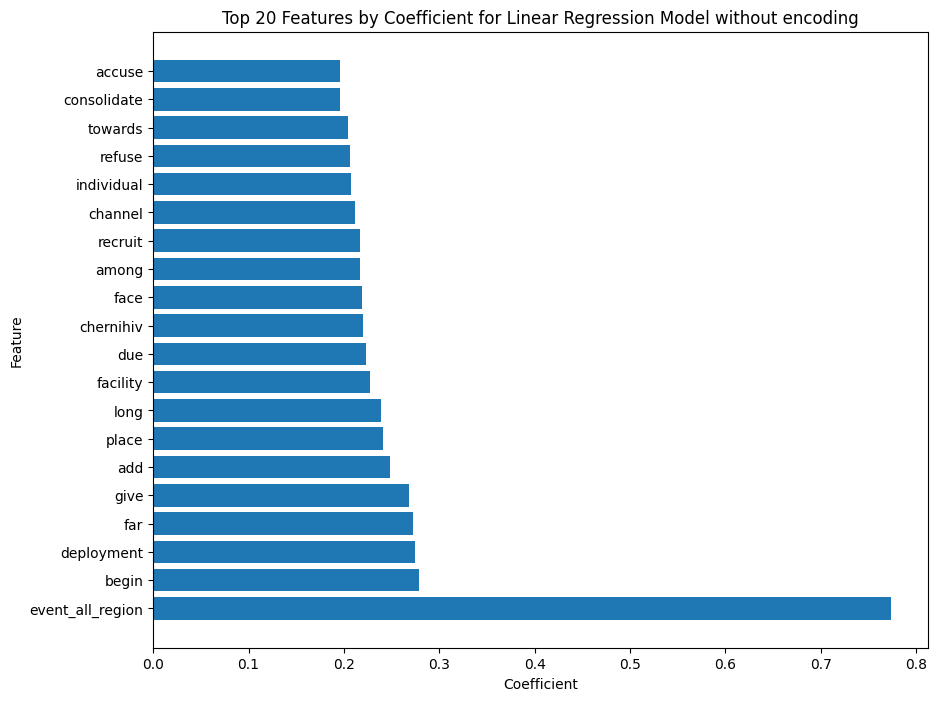

In [76]:
linear_model = joblib.load("linear_regression_model.pkl")
coef_linear_model = linear_model.coef_

coef_linear_model = coef_linear_model.flatten().tolist()
feature_importances_linear = pd.DataFrame({"feature": feature_names, "coefficient":coef_linear_model})
top_features_linear = feature_importances_linear.nlargest(20, "coefficient")

plt.figure(figsize=(10, 8))
plt.barh(top_features_linear['feature'], top_features_linear['coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 20 Features by Coefficient for Linear Regression Model without encoding')
plt.show()

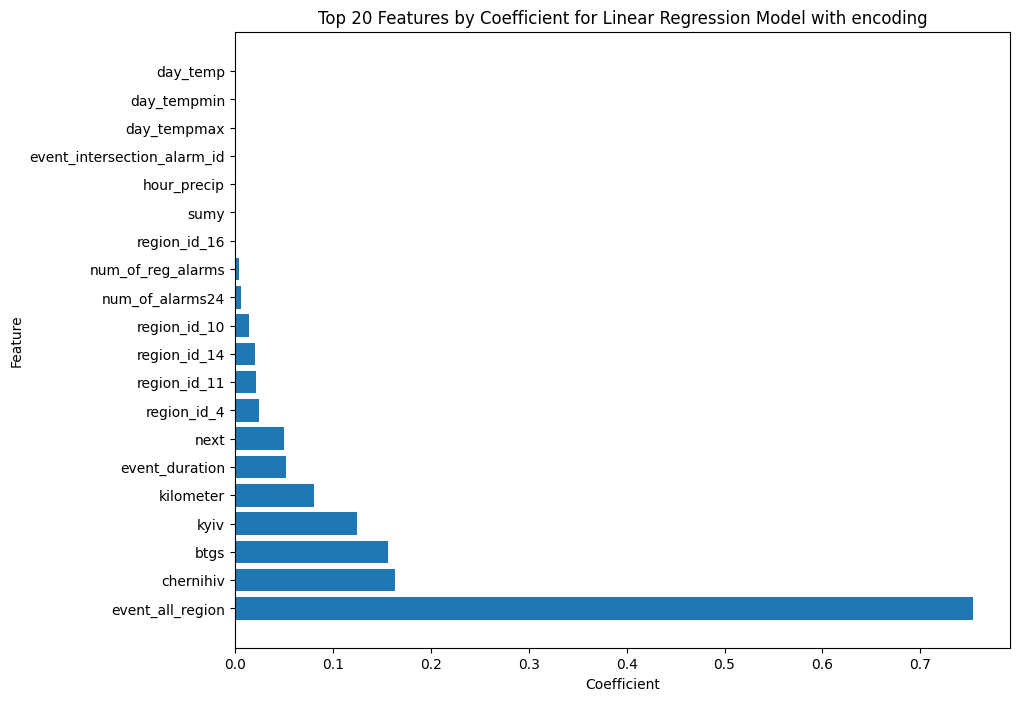

In [77]:
final_df_encoded = pd.read_csv("/Users/ivantyshchenko/Documents/GitHub/4-pythonic-squad/source/train/final_dataset_encoded.csv")
final_df_encoded = final_df_encoded.drop(['date', 'hour_datetime', "is_alarm"], axis=1)
feature_names_encoded = final_df_encoded.columns.tolist()

linear_model_enc = joblib.load("linear_regression_model_encoded_test.pkl")
coef_linear_model_enc = linear_model_enc.coef_

coef_linear_model_enc = coef_linear_model_enc.flatten().tolist()
feature_importances_linear_enc = pd.DataFrame({"feature": feature_names_encoded, "coefficient":coef_linear_model_enc})
top_features_linear_enc = feature_importances_linear_enc.nlargest(20, "coefficient")

plt.figure(figsize=(10, 8))
plt.barh(top_features_linear_enc['feature'], top_features_linear_enc['coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 20 Features by Coefficient for Linear Regression Model with encoding')
plt.show()

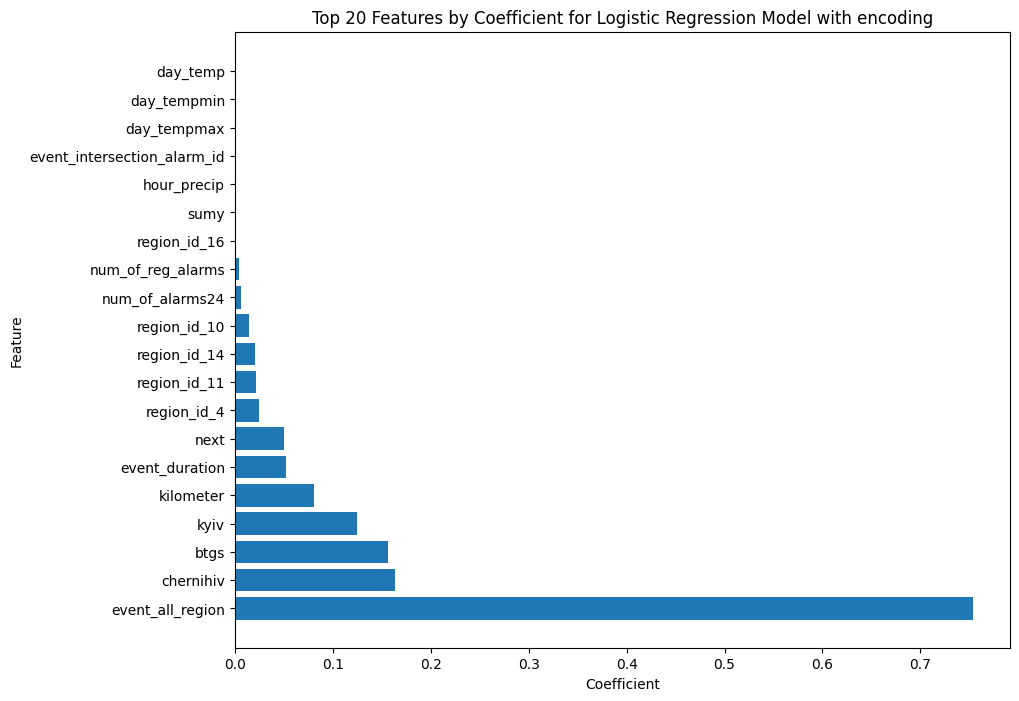

In [78]:
linear_model_enc = joblib.load("linear_regression_model_encoded_test.pkl")
coef_logistic_model_enc = linear_model_enc.coef_

coef_logistic_model_enc = coef_logistic_model_enc.flatten().tolist()
feature_importances_logistic_enc = pd.DataFrame({"feature": feature_names_encoded, "coefficient":coef_logistic_model_enc})
top_features_logistic_enc = feature_importances_logistic_enc.nlargest(20, "coefficient")

plt.figure(figsize=(10, 8))
plt.barh(top_features_logistic_enc['feature'], top_features_logistic_enc['coefficient'])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Top 20 Features by Coefficient for Logistic Regression Model with encoding')
plt.show()